Following the audio data pipeline at https://towardsdatascience.com/how-to-build-efficient-audio-data-pipelines-with-tensorflow-2-0-b3133474c3c1

Tensorflow io exploration: https://www.tensorflow.org/io/tutorials/audio


In [5]:
import pandas as pd
import tensorflow as tf
from glob import glob

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [4]:
df = pd.read_csv('input/birdclef-2021/train_metadata.csv')
df.head()

primary_label secondary_labels                                  type  \
0        acafly       ['amegfi']  ['begging call', 'call', 'juvenile']   
1        acafly               []                              ['call']   
2        acafly               []                              ['call']   
3        acafly      ['whwbec1']                              ['call']   
4        acafly      ['whwbec1']                              ['call']   

   latitude  longitude      scientific_name         common_name  \
0   35.3860   -84.1250  Empidonax virescens  Acadian Flycatcher   
1    9.1334   -79.6501  Empidonax virescens  Acadian Flycatcher   
2    5.7813   -75.7452  Empidonax virescens  Acadian Flycatcher   
3    4.6717   -75.6283  Empidonax virescens  Acadian Flycatcher   
4    4.6717   -75.6283  Empidonax virescens  Acadian Flycatcher   

                       author        date      filename  \
0                 Mike Nelson  2012-08-12  XC109605.ogg   
1           Allen T. Chartier  2000-12-26   XC11209.ogg   
2     Sergio Chaparro-Herrera  2012-01-10  XC127032.ogg   
3  Oscar Humberto Marin-Gomez  2009-06-19  XC129974.ogg   
4  Oscar Humberto Marin-Gomez  2009-06-19  XC129981.ogg   

                                             license  rating   time  \
0  Creative Commons Attribution-NonCommercial-Sha...     2.5  09:30   
1  Creative Commons Attribution-NonCommercial-Sha...     3.0      ?   
2  Creative Commons Attribution-NonCommercial-Sha...     3.0  15:20   
3  Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   
4  Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   

                                 url  
0  https://www.xeno-canto.org/109605  
1   https://www.xeno-canto.org/11209  
2  https://www.xeno-canto.org/127032  
3  https://www.xeno-canto.org/129974  
4  https://www.xeno-canto.org/129981

In [11]:
files = glob('input/birdclef-2021/train_short_audio/*/*.ogg')
files_tensor = tf.data.Dataset.list_files('input/birdclef-2021/train_short_audio/*/*.ogg', shuffle=False)
files_tensor

<TensorSliceDataset shapes: (), types: tf.string>

In [12]:
tf.strings.split(files_tensor, sep='/')[-2]

ValueError: Attempt to convert a value (<TensorSliceDataset shapes: (), types: tf.string>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>) to a Tensor.

In [9]:
for filename in files[:5]:
    label = tf.strings.split(filename, sep='/')[-2]
    print(label)

tf.Tensor(b'acafly', shape=(), dtype=string)
tf.Tensor(b'acafly', shape=(), dtype=string)
tf.Tensor(b'acafly', shape=(), dtype=string)
tf.Tensor(b'acafly', shape=(), dtype=string)
tf.Tensor(b'acafly', shape=(), dtype=string)


In [31]:
def get_labels_from_path(filename):
    label = tf.strings.split(filename, sep='/')[-2]
    return filename, label
    
def get_dataset():
    file_paths = 'input/birdclef-2021/train_short_audio/*/*.ogg'
    file_paths_ds = tf.data.Dataset.list_files(file_paths, shuffle=False)
    ds = file_paths_ds.map(get_labels_from_path, num_parallel_calls=AUTOTUNE)
    
    return ds

In [32]:
def load_audio(file_path, label):
    audio = tf.io.read_file(file_path)
    audio = tf.audio.decode_vorbis(audio)
    return audio, label

In [33]:
ds = get_dataset()

TypeError: 'TensorSliceDataset' object is not subscriptable

In [21]:
ds

<ParallelMapDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [20]:
for row in ds:
    print(row)

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/banwre1/XC513563.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'banwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/barswa/XC147144.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'barswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/socfly1/XC538359.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'socfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mutswa/XC443125.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mutswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wbwwre1/XC185736.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wbwwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkmtou1/XC217447.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkmtou1'>)
(<tf.Tensor: shape=(), dtype=str

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/leafly/XC311986.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'leafly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/swathr/XC575489.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'swathr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bncfly/XC211407.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bncfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/balori/XC184648.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'balori'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tuftit/XC501232.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tuftit'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/strsal1/XC541172.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'strsal1'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/hutvir/XC372123.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'hutvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/eucdov/XC605385.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'eucdov'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gbwwre1/XC542817.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gbwwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wilsni1/XC335697.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wilsni1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/banana/XC214711.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'banana'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rucwar1/XC259478.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rucwar1'>)
(<tf.Tensor: shape=(), dtype=strin

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mouwar/XC421289.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mouwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/marwre/XC236586.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'marwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gnwtea/XC211997.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gnwtea'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/compau/XC118678.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'compau'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rucwar1/XC596152.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rucwar1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/obnthr1/XC539960.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'obnthr1'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houfin/XC311858.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houfin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/relpar/XC264423.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'relpar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/magwar/XC189804.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'magwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lotduc/XC617244.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lotduc'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yebela1/XC433657.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yebela1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkbplo/XC526439.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkbplo'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/carwre/XC297113.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'carwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/purgal2/XC85083.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'purgal2'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/veery/XC325520.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'veery'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whwdov/XC232955.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whwdov'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/meapar/XC479427.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'meapar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/woothr/XC70697.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'woothr'>)
(<tf.Tensor: shape=(), dtype=string, numpy

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tenwar/XC134523.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tenwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rebwoo/XC473321.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rebwoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ccbfin/XC582962.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ccbfin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mutswa/XC616793.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mutswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whbnut/XC456562.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whbnut'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/squcuc1/XC349309.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'squcuc1'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/burwar1/XC532912.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'burwar1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ruboro1/XC206948.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ruboro1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/pirfly1/XC325460.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'pirfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/reevir1/XC324882.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'reevir1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gohque1/XC260547.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gohque1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/eletro/XC401096.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'eletro'>)
(<tf.Tensor: shape=(), dtype=s

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houfin/XC219762.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houfin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blsspa1/XC532419.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blsspa1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houwre/XC139925.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/verdin/XC574000.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'verdin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ameavo/XC179466.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ameavo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rudtur/XC478858.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rudtur'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grasal1/XC525016.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grasal1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/veery/XC420860.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'veery'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/plsvir/XC450692.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'plsvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gbbgul/XC488945.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gbbgul'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/indbun/XC192310.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'indbun'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sibtan2/XC74141.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sibtan2'>)
(<tf.Tensor: shape=(), dtype=string, nu

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ovenbi1/XC135103.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ovenbi1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whimbr/XC431870.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whimbr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norfli/XC172438.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norfli'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/trokin/XC131763.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'trokin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grekis/XC455017.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grekis'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gwfgoo/XC500506.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gwfgoo'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkbwar/XC600306.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkbwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blujay/XC130505.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blujay'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/aldfly/XC244458.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'aldfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/westan/XC188830.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'westan'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/scptyr1/XC609679.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'scptyr1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tropew1/XC349796.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tropew1'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ducfly/XC1539.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ducfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rawwre1/XC135953.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rawwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grekis/XC285329.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grekis'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/carwre/XC57385.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'carwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grekis/XC446440.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grekis'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brwhaw/XC575078.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brwhaw'>)
(<tf.Tensor: shape=(), dtype=string, nump

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gartro1/XC402472.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gartro1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/astfly/XC122817.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'astfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/casfin/XC282429.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'casfin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/compau/XC353308.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'compau'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/buhvir/XC561368.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'buhvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yebcha/XC477080.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yebcha'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tuftit/XC327787.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tuftit'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/swathr/XC235677.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'swathr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amerob/XC569292.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amerob'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tropar/XC298076.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tropar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amered/XC243788.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amered'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/solsan/XC602555.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'solsan'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norcar/XC579902.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norcar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/clcrob/XC315320.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'clcrob'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sumtan/XC256439.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sumtan'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norwat/XC413630.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norwat'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bobfly1/XC258983.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bobfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mastro1/XC533052.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mastro1'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tuftit/XC168006.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tuftit'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/greegr/XC109030.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'greegr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whiwre1/XC593040.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whiwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wiltur/XC283329.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wiltur'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/cobtan1/XC286836.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'cobtan1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/killde/XC318018.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'killde'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rubpep1/XC250750.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rubpep1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC323442.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/andsol1/XC532641.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'andsol1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/canwar/XC189299.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'canwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/trokin/XC513642.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'trokin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/scbwre1/XC217258.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'scbwre1'>)
(<tf.Tensor: shape=(), dtype=strin

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/dowwoo/XC290063.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'dowwoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gbwwre1/XC261081.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gbwwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/barswa/XC585512.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'barswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/clcrob/XC277331.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'clcrob'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/barant1/XC353674.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'barant1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/olsfly/XC558343.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'olsfly'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bnhcow/XC188430.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bnhcow'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/marwre/XC31174.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'marwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bobfly1/XC334068.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bobfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norsho/XC447055.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norsho'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houwre/XC243193.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/herthr/XC575485.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'herthr'>)
(<tf.Tensor: shape=(), dtype=string, nu

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houwre/XC500153.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whevir/XC582725.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whevir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blcjay1/XC235666.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blcjay1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gbwwre1/XC127189.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gbwwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lesvio1/XC47228.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lesvio1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkmtou1/XC576462.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkmtou1'>)
(<tf.Tensor: shape=(), dtype=stri

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yetvir/XC615888.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yetvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/caskin/XC323435.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'caskin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/fiespa/XC323530.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'fiespa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houspa/XC553939.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/creoro1/XC478231.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'creoro1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blkpho/XC192055.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blkpho'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brcvir1/XC217011.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brcvir1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/buhvir/XC306387.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'buhvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sltred/XC334849.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sltred'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rewbla/XC542233.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rewbla'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bcnher/XC601229.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bcnher'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houspa/XC269446.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houspa'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lesgre1/XC242779.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lesgre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/savspa/XC322771.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'savspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whtdov/XC440870.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whtdov'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/leasan/XC329620.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'leasan'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amegfi/XC298362.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amegfi'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whbman1/XC347738.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whbman1'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/clcrob/XC161066.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'clcrob'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sobtyr1/XC299143.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sobtyr1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/pabspi1/XC371514.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'pabspi1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkhgro/XC481869.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkhgro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/dowwoo/XC531291.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'dowwoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/annhum/XC330111.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'annhum'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/coohaw/XC190138.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'coohaw'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brnthr/XC235031.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brnthr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tuftit/XC590611.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tuftit'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/semplo/XC146854.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'semplo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/casfin/XC551543.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'casfin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grekis/XC452768.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grekis'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/normoc/XC320709.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'normoc'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yelgro/XC445829.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yelgro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rucspa1/XC152564.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rucspa1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/savspa/XC237511.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'savspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whevir/XC322368.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whevir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amerob/XC320503.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amerob'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/meapar/XC519172.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'meapar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houspa/XC168649.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amegfi/XC210744.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amegfi'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/trogna1/XC338542.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'trogna1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blkpho/XC402596.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blkpho'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC323680.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/spotow/XC540262.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'spotow'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/snogoo/XC455506.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'snogoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/snogoo/XC173139.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'snogoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grycat/XC556288.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grycat'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/thbeup1/XC453627.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'thbeup1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/clcrob/XC435960.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'clcrob'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brbmot1/XC342222.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brbmot1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/laufal1/XC147266.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'laufal1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blbgra1/XC524137.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blbgra1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/soulap1/XC48574.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'soulap1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gocfly1/XC250137.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gocfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/barswa/XC457819.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'barswa'>)
(<tf.Tensor: shape=(), dtype=st

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/scatan/XC420560.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'scatan'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sibtan2/XC389658.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sibtan2'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tuftit/XC316285.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tuftit'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whtdov/XC50882.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whtdov'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whbman1/XC262315.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whbman1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/cangoo/XC420861.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'cangoo'>)
(<tf.Tensor: shape=(), dtype=string, 

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sobtyr1/XC336333.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sobtyr1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sthant1/XC373171.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sthant1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blbthr1/XC550000.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blbthr1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bncfly/XC123416.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bncfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/robgro/XC31103.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'robgro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/plupig2/XC43900.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'plupig2'>)
(<tf.Tensor: shape=(), dtype=strin

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/swathr/XC368633.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'swathr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/daejun/XC340518.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'daejun'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/compot1/XC479991.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'compot1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amecro/XC479493.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amecro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/laufal1/XC496655.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'laufal1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/marwre/XC31173.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'marwre'>)
(<tf.Tensor: shape=(), dtype=string, 

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/linspa/XC188444.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'linspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC483711.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/annhum/XC544387.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'annhum'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whfpar1/XC335839.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whfpar1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/greegr/XC412523.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'greegr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rocpig/XC199202.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rocpig'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/btnwar/XC171555.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'btnwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/comrav/XC301671.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'comrav'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whcsee1/XC188820.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whcsee1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bushti/XC588322.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bushti'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lazbun/XC381078.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lazbun'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/daejun/XC476732.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'daejun'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/woothr/XC70691.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'woothr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ocbfly1/XC139221.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ocbfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/barant1/XC335506.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'barant1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/banswa/XC139144.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'banswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/aldfly/XC216213.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'aldfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/barswa/XC334130.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'barswa'>)
(<tf.Tensor: shape=(), dtype=string, 

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC322002.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norwat/XC313670.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norwat'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ccbfin/XC130098.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ccbfin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gadwal/XC544393.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gadwal'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yebori1/XC580682.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yebori1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/squcuc1/XC536122.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'squcuc1'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/laugul/XC317053.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'laugul'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ovenbi1/XC488399.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ovenbi1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blbthr1/XC340086.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blbthr1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/socfly1/XC248259.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'socfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/redcro/XC112489.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'redcro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/pasfly/XC353033.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'pasfly'>)
(<tf.Tensor: shape=(), dtype=strin

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whevir/XC263477.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whevir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/casfin/XC551517.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'casfin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/compau/XC196391.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'compau'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/labwoo/XC617540.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'labwoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gamqua/XC610542.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gamqua'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC613103.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/andsol1/XC390786.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'andsol1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bnhcow/XC160983.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bnhcow'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whcspa/XC236241.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whcspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blbthr1/XC74706.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blbthr1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yehbla/XC110084.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yehbla'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/redcro/XC58620.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'redcro'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norcar/XC582543.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norcar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/roahaw/XC339951.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'roahaw'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/swathr/XC560674.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'swathr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rebwoo/XC197313.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rebwoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/cliswa/XC325095.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'cliswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/scbwre1/XC182097.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'scbwre1'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/comrav/XC433222.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'comrav'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/carwre/XC197277.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'carwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brratt1/XC166417.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brratt1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gockin/XC538581.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gockin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gadwal/XC441670.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gadwal'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grhowl/XC604897.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grhowl'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mutswa/XC605139.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mutswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norfli/XC288990.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norfli'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/larspa/XC184978.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'larspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/greyel/XC149443.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'greyel'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rthhum/XC166295.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rthhum'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brebla/XC377880.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brebla'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/strcuc1/XC239067.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'strcuc1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/caster1/XC385956.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'caster1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yefgra1/XC174871.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yefgra1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ducfly/XC197491.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ducfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/chswar/XC166427.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'chswar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/casfin/XC483195.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'casfin'>)
(<tf.Tensor: shape=(), dtype=strin

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkhgro/XC325267.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkhgro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wewpew/XC140140.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wewpew'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/linwoo1/XC199145.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'linwoo1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wilfly/XC546125.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wilfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mutswa/XC595893.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mutswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/olsfly/XC433333.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'olsfly'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norwat/XC554810.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norwat'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/cedwax/XC294071.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'cedwax'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/roahaw/XC245043.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'roahaw'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lucwar/XC616372.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lucwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/normoc/XC449503.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'normoc'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/spotow/XC126679.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'spotow'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/savspa/XC337934.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'savspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tenwar/XC189619.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tenwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mallar3/XC597130.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mallar3'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rudpig/XC257600.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rudpig'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ducfly/XC123777.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ducfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/obnthr1/XC577576.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'obnthr1'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/redcro/XC352815.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'redcro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/babwar/XC477393.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'babwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/socfly1/XC166807.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'socfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rcatan1/XC294685.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rcatan1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whcspa/XC504272.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whcspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/creoro1/XC122317.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'creoro1'>)
(<tf.Tensor: shape=(), dtype=strin

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grekis/XC360723.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grekis'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/caster1/XC487213.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'caster1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houfin/XC440009.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houfin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/smbani/XC378897.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'smbani'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gcrwar/XC283676.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gcrwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norwat/XC463113.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norwat'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tropar/XC170758.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tropar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lesgre1/XC125932.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lesgre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkmtou1/XC10565.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkmtou1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wlswar/XC615828.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wlswar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sibtan2/XC455113.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sibtan2'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mouqua/XC329439.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mouqua'>)
(<tf.Tensor: shape=(), dtype=string

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brnthr/XC167821.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brnthr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/caltow/XC493963.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'caltow'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bknsti/XC143707.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bknsti'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/weskin/XC413153.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'weskin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/btywar/XC616347.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'btywar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grekis/XC135770.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grekis'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/killde/XC514061.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'killde'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brbsol1/XC233014.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brbsol1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wbwwre1/XC28429.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wbwwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houwre/XC317810.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rubpep1/XC211112.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rubpep1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/dusfly/XC452354.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'dusfly'>)
(<tf.Tensor: shape=(), dtype=string

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/clanut/XC332933.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'clanut'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whimbr/XC500444.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whimbr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/robgro/XC495791.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'robgro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bewwre/XC510737.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bewwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mallar3/XC462132.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mallar3'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bewwre/XC173148.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bewwre'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gbwwre1/XC398525.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gbwwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bcnher/XC481923.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bcnher'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/saypho/XC174100.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'saypho'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sltred/XC291501.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sltred'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rinkin1/XC591406.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rinkin1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/plupig2/XC43919.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'plupig2'>)
(<tf.Tensor: shape=(), dtype=string

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/chbwre1/XC507057.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'chbwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/cocwoo1/XC526157.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'cocwoo1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/baleag/XC535101.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'baleag'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/macwar/XC411256.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'macwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rubpep1/XC170343.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rubpep1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/easmea/XC428221.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'easmea'>)
(<tf.Tensor: shape=(), dtype=strin

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bcnher/XC553848.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bcnher'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mallar3/XC464843.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mallar3'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC323238.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/reshaw/XC573945.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'reshaw'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wewpew/XC443221.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wewpew'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amegfi/XC366625.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amegfi'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whwdov/XC254544.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whwdov'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brbmot1/XC404763.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brbmot1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rebwoo/XC363720.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rebwoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/strsal1/XC598393.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'strsal1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/greegr/XC247286.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'greegr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/magwar/XC444957.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'magwar'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sltred/XC217003.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sltred'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amerob/XC467818.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amerob'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/y00475/XC152723.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'y00475'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/putfru1/XC330498.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'putfru1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/linspa/XC325256.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'linspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blbgra1/XC398968.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blbgra1'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/andsol1/XC187003.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'andsol1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/smbani/XC407293.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'smbani'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/cacwre/XC324050.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'cacwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkbplo/XC526473.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkbplo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amewig/XC187408.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amewig'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/indbun/XC579453.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'indbun'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/carchi/XC237815.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'carchi'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/trokin/XC503447.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'trokin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houwre/XC265809.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bewwre/XC164309.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bewwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grekis/XC285330.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grekis'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/woothr/XC179641.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'woothr'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkhgro/XC367594.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkhgro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/scptyr1/XC56905.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'scptyr1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whbman1/XC480632.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whbman1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houwre/XC259360.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC253391.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wbwwre1/XC525148.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wbwwre1'>)
(<tf.Tensor: shape=(), dtype=string

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/strfly1/XC585010.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'strfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whevir/XC353639.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whevir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gnwtea/XC594238.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gnwtea'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/botgra/XC143806.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'botgra'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/compau/XC164865.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'compau'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bewwre/XC333589.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bewwre'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rewbla/XC149449.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rewbla'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yerwar/XC387124.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yerwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/comyel/XC618354.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'comyel'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/buggna/XC137605.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'buggna'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/comrav/XC390197.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'comrav'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gnttow/XC255172.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gnttow'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkhgro/XC270182.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkhgro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grcfly/XC402583.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grcfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/cotfly1/XC450795.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'cotfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sonspa/XC490927.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sonspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/roahaw/XC288830.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'roahaw'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grtgra/XC453172.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grtgra'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rucspa1/XC390838.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rucspa1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whcspa/XC459465.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whcspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sltred/XC251160.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sltred'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/oliwoo1/XC420710.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'oliwoo1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grethr1/XC587911.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grethr1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rubrob/XC448296.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rubrob'>)
(<tf.Tensor: shape=(), dtype=strin

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/chbwre1/XC117820.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'chbwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grekis/XC432952.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grekis'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/leasan/XC338291.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'leasan'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/laugul/XC130758.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'laugul'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lotman1/XC334575.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lotman1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wiltur/XC481141.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wiltur'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/socfly1/XC352294.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'socfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/spotow/XC183583.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'spotow'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/marwre/XC482806.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'marwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lesgre1/XC489550.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lesgre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/squcuc1/XC265400.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'squcuc1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blugrb1/XC52313.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blugrb1'>)
(<tf.Tensor: shape=(), dtype=stri

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lesvio1/XC238196.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lesvio1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/cacwre/XC297279.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'cacwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rumfly1/XC566751.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rumfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bbwduc/XC286820.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bbwduc'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/banana/XC287776.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'banana'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bbwduc/XC513475.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bbwduc'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC550356.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norfli/XC613548.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norfli'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rudpig/XC345020.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rudpig'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/btbwar/XC574511.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'btbwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/trokin/XC163744.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'trokin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/naswar/XC470856.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'naswar'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wlswar/XC370597.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wlswar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brnthr/XC364468.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brnthr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whwbec1/XC129905.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whwbec1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/strfly1/XC2521.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'strfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whtspa/XC237649.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whtspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/butsal1/XC251474.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'butsal1'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wewpew/XC330638.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wewpew'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/pinsis/XC195043.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'pinsis'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkhgro/XC369969.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkhgro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rucwar1/XC532867.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rucwar1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/comrav/XC613829.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'comrav'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tuftit/XC544303.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tuftit'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/plsvir/XC417908.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'plsvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blbgra1/XC424492.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blbgra1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whevir/XC389958.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whevir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norcar/XC505088.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norcar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wewpew/XC184228.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wewpew'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/plupig2/XC535549.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'plupig2'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/webwoo1/XC394821.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'webwoo1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/orcpar/XC46977.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'orcpar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/trokin/XC282322.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'trokin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mallar3/XC496587.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mallar3'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/greyel/XC257506.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'greyel'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bugtan/XC213745.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bugtan'>)
(<tf.Tensor: shape=(), dtype=string, 

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blugrb1/XC489429.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blugrb1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/normoc/XC559555.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'normoc'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/creoro1/XC387943.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'creoro1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sonspa/XC375748.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sonspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/thbkin/XC493307.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'thbkin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norpar/XC192437.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norpar'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/dusfly/XC124640.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'dusfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sonspa/XC575029.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sonspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/vigswa/XC164579.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'vigswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/spotow/XC187305.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'spotow'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rewbla/XC323255.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rewbla'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC481120.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amered/XC135440.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amered'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yebela1/XC6548.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yebela1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sonspa/XC191448.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sonspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/oliwoo1/XC207580.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'oliwoo1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grethr1/XC153902.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grethr1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ruckin/XC185179.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ruckin'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grhowl/XC473806.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grhowl'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grycat/XC420835.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grycat'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sonspa/XC320469.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sonspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rucspa1/XC413673.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rucspa1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/smbani/XC577135.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'smbani'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/greegr/XC575428.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'greegr'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blugrb1/XC158380.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blugrb1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/leafly/XC53849.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'leafly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grcfly/XC112520.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grcfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/caster1/XC485505.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'caster1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wooduc/XC395016.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wooduc'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/scbwre1/XC253667.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'scbwre1'>)
(<tf.Tensor: shape=(), dtype=string

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/compau/XC197668.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'compau'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rewbla/XC233809.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rewbla'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brratt1/XC496783.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brratt1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/eastow/XC333618.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'eastow'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mouqua/XC146192.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mouqua'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rcatan1/XC133977.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rcatan1'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lesvio1/XC375468.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lesvio1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC472217.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/purgal2/XC457186.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'purgal2'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/pasfly/XC377112.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'pasfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grycat/XC31055.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grycat'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brbsol1/XC291667.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brbsol1'>)
(<tf.Tensor: shape=(), dtype=string

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/towsol/XC603272.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'towsol'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norwat/XC451025.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norwat'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/dowwoo/XC549599.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'dowwoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bushti/XC578509.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bushti'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mutswa/XC309190.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mutswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sobtyr1/XC208631.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sobtyr1'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whiwre1/XC457561.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whiwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whcspa/XC54715.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whcspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bulori/XC263465.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bulori'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yeteup1/XC132717.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yeteup1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/banwre1/XC31477.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'banwre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whwdov/XC375806.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whwdov'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sumtan/XC135701.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sumtan'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/smbani/XC154431.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'smbani'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blsspa1/XC170162.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blsspa1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/stejay/XC139850.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'stejay'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grhowl/XC291157.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grhowl'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rebnut/XC475277.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rebnut'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grbher3/XC297794.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grbher3'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/belvir/XC559341.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'belvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blugrb1/XC557306.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blugrb1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/cangoo/XC287160.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'cangoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/littin1/XC494771.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'littin1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/scbwre1/XC251125.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'scbwre1'>)
(<tf.Tensor: shape=(), dtype=str

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/banswa/XC31293.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'banswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/barswa/XC396335.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'barswa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/redcro/XC165004.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'redcro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grethr1/XC616265.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grethr1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/eursta/XC538677.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'eursta'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/canwar/XC52326.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'canwar'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/redcro/XC113904.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'redcro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whevir/XC381407.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whevir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rethaw/XC327575.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rethaw'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gockin/XC328713.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gockin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/daejun/XC343276.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'daejun'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/magwar/XC134300.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'magwar'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blujay/XC234669.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blujay'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sonspa/XC131959.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sonspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mastro1/XC529320.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mastro1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lesvio1/XC260473.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lesvio1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wegspa1/XC334214.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wegspa1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/daejun/XC381592.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'daejun'>)
(<tf.Tensor: shape=(), dtype=strin

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houwre/XC203735.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/foxspa/XC347354.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'foxspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gocfly1/XC235992.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gocfly1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/yetvir/XC579823.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'yetvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/astfly/XC122811.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'astfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/scatan/XC54419.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'scatan'>)
(<tf.Tensor: shape=(), dtype=string, nu

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whcspa/XC289378.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whcspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/orbspa1/XC376398.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'orbspa1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tenwar/XC176268.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tenwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/robgro/XC240407.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'robgro'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/compau/XC85242.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'compau'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lobgna5/XC452927.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lobgna5'>)
(<tf.Tensor: shape=(), dtype=string, 

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bkbplo/XC444643.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bkbplo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/compot1/XC452812.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'compot1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rucwar/XC500140.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rucwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brratt1/XC544530.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brratt1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/pilwoo/XC306664.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'pilwoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/snogoo/XC458852.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'snogoo'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/fiespa/XC154301.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'fiespa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/eursta/XC390879.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'eursta'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/thbeup1/XC562465.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'thbeup1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/prowar/XC413204.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'prowar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gnwtea/XC542298.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gnwtea'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/naswar/XC225341.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'naswar'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bawwar/XC253922.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bawwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/normoc/XC321902.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'normoc'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mouchi/XC221613.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mouchi'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grbher3/XC582377.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grbher3'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bulori/XC563918.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bulori'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/verdin/XC381402.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'verdin'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/purfin/XC227869.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'purfin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/baywre1/XC521250.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'baywre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grhowl/XC432233.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grhowl'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/carwre/XC322024.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'carwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/categr/XC414792.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'categr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/buhvir/XC420844.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'buhvir'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wrenti/XC357920.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wrenti'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/cubthr/XC538375.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'cubthr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ovenbi1/XC418148.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ovenbi1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grnjay/XC494318.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grnjay'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rewbla/XC143664.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rewbla'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/easmea/XC409947.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'easmea'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rewbla/XC234322.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rewbla'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sibtan2/XC244659.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sibtan2'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lobgna5/XC125936.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lobgna5'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/buhvir/XC421280.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'buhvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tuftit/XC575273.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tuftit'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bcnher/XC614900.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bcnher'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sumtan/XC135246.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sumtan'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/osprey/XC27026.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'osprey'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/daejun/XC348371.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'daejun'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lesgre1/XC368722.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lesgre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/astfly/XC610531.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'astfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wbwwre1/XC434191.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wbwwre1'>)
(<tf.Tensor: shape=(), dtype=string, 

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tropew1/XC460316.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tropew1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/woothr/XC555100.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'woothr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amekes/XC289663.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amekes'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/carwre/XC316023.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'carwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/amered/XC147064.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'amered'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grhowl/XC434219.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grhowl'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/pavpig2/XC532830.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'pavpig2'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lesgre1/XC275520.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lesgre1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/ducfly/XC519785.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'ducfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/pygnut/XC313506.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'pygnut'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/eastow/XC294124.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'eastow'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gcrwar/XC326020.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gcrwar'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/herthr/XC211201.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'herthr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rudpig/XC524022.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rudpig'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bncfly/XC123281.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bncfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whbman1/XC263836.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whbman1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wilfly/XC325258.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wilfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wlswar/XC406214.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wlswar'>)
(<tf.Tensor: shape=(), dtype=string, n

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/swathr/XC398335.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'swathr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/buggna/XC309926.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'buggna'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/comgol/XC11841.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'comgol'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/grhowl/XC365492.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'grhowl'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/blugrb1/XC322479.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'blugrb1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/chbant1/XC112866.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'chbant1'>)
(<tf.Tensor: shape=(), dtype=string, 

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/carwre/XC130534.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'carwre'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/sonspa/XC290132.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'sonspa'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gadwal/XC597173.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gadwal'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/stejay/XC558711.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'stejay'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/chbchi/XC561445.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'chbchi'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gocspa/XC451212.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gocspa'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/mouwar/XC448187.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'mouwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/eucdov/XC459021.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'eucdov'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/labwoo/XC173169.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'labwoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/eucdov/XC559917.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'eucdov'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/gnwtea/XC465870.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'gnwtea'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/whtdov/XC538019.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'whtdov'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/pasfly/XC182545.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'pasfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/rcatan1/XC293562.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'rcatan1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/olsfly/XC534107.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'olsfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bncfly/XC288942.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bncfly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/orfpar/XC349936.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'orfpar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/chbwre1/XC354322.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'chbwre1'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/belvir/XC215885.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'belvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/houfin/XC579294.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'houfin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/snogoo/XC362121.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'snogoo'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/wesmea/XC355306.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'wesmea'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/bugtan/XC537890.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'bugtan'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/haiwoo/XC301387.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'haiwoo'>)
(<tf.Tensor: shape=(), dtype=string, num

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/tromoc/XC602886.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'tromoc'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/lucwar/XC323608.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lucwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brbsol1/XC138130.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brbsol1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/azaspi1/XC154587.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'azaspi1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/warvir/XC252370.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'warvir'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/norfli/XC494451.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'norfli'>)
(<tf.Tensor: shape=(), dtype=string,

(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/macwar/XC158382.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'macwar'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/trokin/XC446383.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'trokin'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/logshr/XC255246.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'logshr'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/coltro1/XC384527.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'coltro1'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/leafly/XC476131.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'leafly'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'input/birdclef-2021/train_short_audio/brncre/XC155442.ogg'>, <tf.Tensor: shape=(), dtype=string, numpy=b'brncre'>)
(<tf.Tensor: shape=(), dtype=string, n

KeyboardInterrupt: 

In [39]:
import tensorflow_io as tfio

In [40]:
file_path = 'input/birdclef-2021/train_short_audio/banwre1/XC513563.ogg'
audio = tf.io.read_file(file_path)
audio = tfio.audio.decode_vorbis(audio)

In [41]:
import matplotlib.pyplot as plt


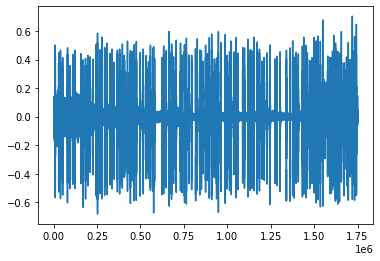

In [43]:
plt.plot(audio)

In [52]:
audio = tfio.audio.AudioIOTensor(file_path)
print(audio)

<AudioIOTensor: shape=[1752857       1], dtype=<dtype: 'float32'>, rate=32000>


In [124]:
audio_slice = audio[:20000]
audio_slice

<tf.Tensor: shape=(20000, 1), dtype=float32, numpy=
array([[-8.1090082e-05],
       [ 4.9273229e-05],
       [ 5.8783160e-05],
       ...,
       [ 3.6057338e-02],
       [ 2.7946837e-02],
       [ 2.5537295e-02]], dtype=float32)>

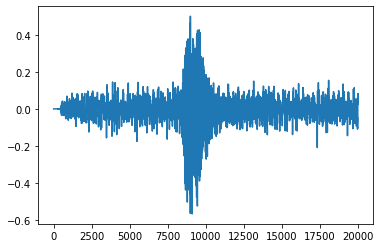

In [125]:
plt.plot(audio_slice.numpy())

In [126]:
audio.rate

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [127]:
from IPython.display import Audio

In [128]:
audio_tensor = tf.squeeze(audio_slice, axis=[-1])

In [129]:
import numpy as np

In [130]:
tensor = tf.cast(audio_tensor, tf.float32)#  / 32768.0
np.max(tensor)

0.50125116

In [131]:
Audio(tensor.numpy(), rate=audio.rate.numpy())

In [132]:
spectrogram = tfio.experimental.audio.spectrogram(tensor, nfft=512, window=512, stride=256)

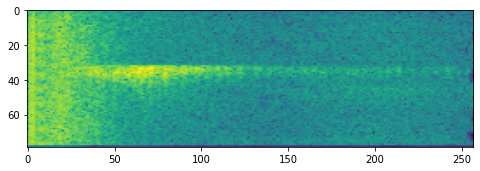

In [133]:
plt.figure(figsize=(8,8))
plt.imshow(tf.math.log(spectrogram).numpy())

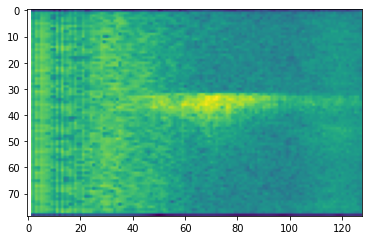

In [139]:
# convert to mel-spectrogram
mel_spectrogram = tfio.experimental.audio.melscale(
    spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)

plt.imshow(tf.math.log(mel_spectrogram).numpy())

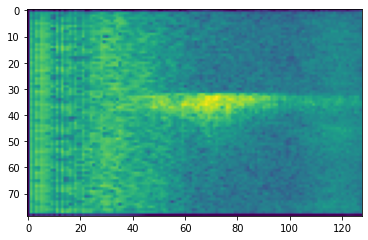

In [140]:
dbscale_mel_spectrogram = tfio.experimental.audio.dbscale(
    mel_spectrogram, top_db=80)

plt.imshow(dbscale_mel_spectrogram.numpy())

In [ ]:
# frequency masking